# Clustering Jerárquico en Machine Learning

También conocido como **hierarchical clustering**, **hierarchical cluster** analysis o **HCA**, busca construir una jerarquía entre los distintos **agrupamientos** (clusters) de datos.

A diferenia de otros métodos similares como _k-means_, haciendo agrupamientos con centroides y teniendo que especificar el número de clusters, el HCA no requiere dicha especificación, y nos proporciona una herramienta visual llamada **Dendrograma** que nos ayuda a determinar el número óptimo de clusters.

Existen dos enfoques:

1. **Aglomerativo o bottom-up**, que comienza tratando cada punto de los datos como un cluster individual y luego va iterando entre esos clusters y fusionando los más cercanos hasta que todos los puntos se han fusionado en un único cluster que contiene a todos esos datos.

2. **Divisivo o top-down**, que comienza justamente con un único cluster que contiene todos los puntos de datos y luego va recorriendo el cluster de manera iterativa, dividiéndolo en clusters más pequeños hasta que cada punto se encuentre en su propio cluster.

La decisión sobre el enfoque dependerá de los datos específicos, de las preferencias del usuario y/o de las necesidades del cliente.

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
iris = load_iris()

In [3]:
x = iris.data  # las 4 columnas de los pétalos y sépalos

In [5]:
# Guardar el clustering jerárquico en una variable
linked = linkage(x, 'ward')

El método `'ward'` es una opción muy popular para el clustering jerárquico aglomerativo, porque se enfoca en **minimizar la varianza** dentro de cada clúster, en cada paso de la fusión y así se intenta **asegurar que los clusters sean lo más compactos y lo más homogéneos posible**.

Por supuesto, hay otros métodos que se pueden revisar en la [documentación oficial](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html), y que pueden servir a otros propósitos según se les requiera.

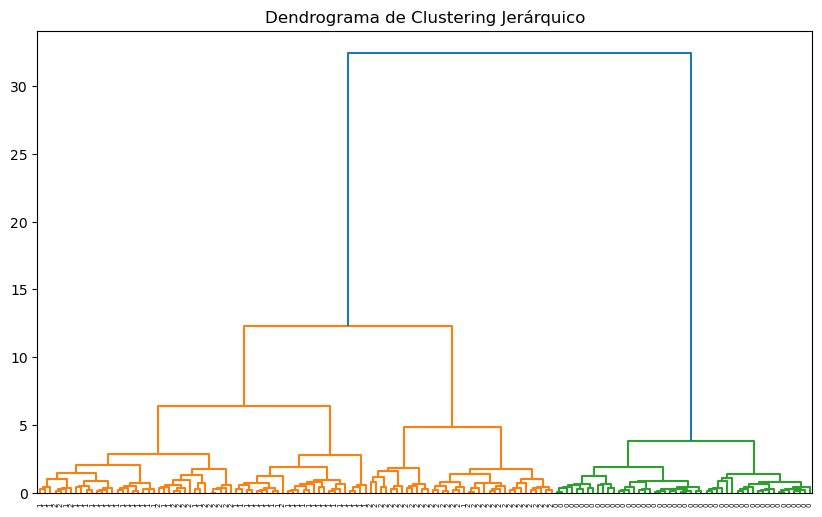

In [6]:
# Visualizar el dendrograma
plt.figure(figsize=(10, 6))
dendrogram(
    linked,
    orientation='top',
    labels=iris.target,
    distance_sort='descending',
    show_leaf_counts=True
)
plt.title('Dendrograma de Clustering Jerárquico')
plt.show()

**Explicación:**

- `linked` es el primer y el principal argumento porque le proporciona al dendrograma los datos de enlaces generados por la función `linkage` que hemos generado antes, que dirige a los datos de `iris.data`. Este parámetro contiene la información sobre las distancias o sobre las similitudes que hay entre los clusters en cada etapa del proceso de clustering jerárquico y como los clusters se combinan en cada paso.

- `orientation` simplemente especifica la orientación del dendrograma. De esta manera, con `'top'` estamos diciendo que dibuje con las raíces en la parte superior y las hojas se extienden hacia abajo.

- `labels` asigna etiquetas a las hojas del dendograma que están en el inferior. En este caso, son imposibles de visualizar porque son muchísimas. 😅

- `distance_sort` controla cómo se van a ordenar las ramas en el dendrograma. Con `'descending'`, las ramas que se fusionaron más tarde se van a colocar más cerca de la parte superior del dendrograma y esto puede ayudar a **identificar los principales grupos** o las **principales divisiones** dentro de los datos.

- `show_leaf_counts`, cuando lo ponemos como `True`, este parámetro añade números entre paréntesis al final de las etiquetas de las hojas para indicar el número de puntos de datos originales contenidos en el cluster. Esto es particularmente útil para entender el **tamaño de los clusters** sin necesidad de contar manualmente las hojas del dendograma.